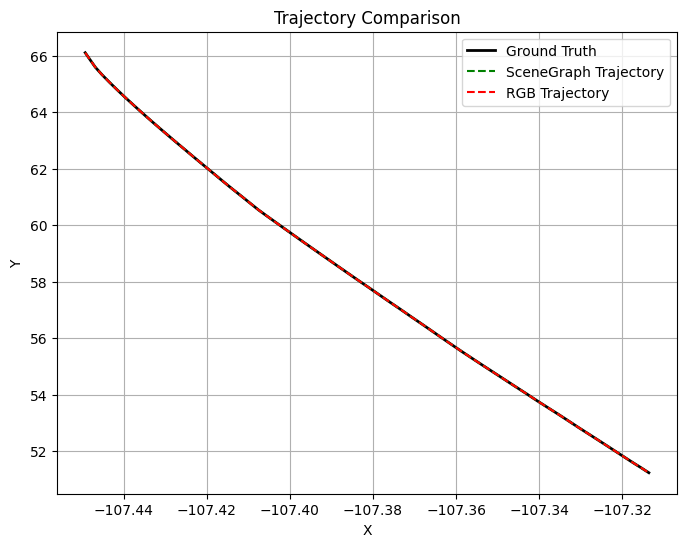

In [3]:
import random
import matplotlib.pyplot as plt

def read_positions(file_path, max_points=50):
    data = []
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split(",")
            if len(parts) >= 4:
                idx = int(parts[0].strip())
                x = float(parts[1].strip())
                y = float(parts[2].strip())
                z = float(parts[3].strip())
                data.append((idx, x, y, z))
                if len(data) >= max_points:
                    break
    return data

def generate_with_error(data, error_range):
    new_traj = []
    for idx, x, y, z in data:
        # Add random error to z value
        new_z = random.uniform(*error_range)
        new_traj.append((idx, x, y, new_z))
    return new_traj

def plot_trajectories(gt, scenegraph, rgb):
    # Ground truth
    x_gt = [p[1] for p in gt]
    y_gt = [p[2] for p in gt]

    # SceneGraph
    x_sc = [p[1] for p in scenegraph]
    y_sc = [p[2] for p in scenegraph]

    # RGB
    x_rgb = [p[1] for p in rgb]
    y_rgb = [p[2] for p in rgb]

    plt.figure(figsize=(8,6))
    plt.plot(x_gt, y_gt, 'k-', label="Ground Truth", linewidth=2)
    plt.plot(x_sc, y_sc, 'g--', label="SceneGraph Trajectory")
    plt.plot(x_rgb, y_rgb, 'r--', label="RGB Trajectory")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajectory Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "/home/irfan/roadscene2vec/examples/transferdata/pos.txt"  # <-- change to your file path
    ground_truth = read_positions(file_path, max_points=100)

    # Generate versions with error
    scenegraph_traj = generate_with_error(ground_truth, (0.01, 0.04))
    rgb_traj = generate_with_error(ground_truth, (4, 5))

    # Plot results
    plot_trajectories(ground_truth, scenegraph_traj, rgb_traj)


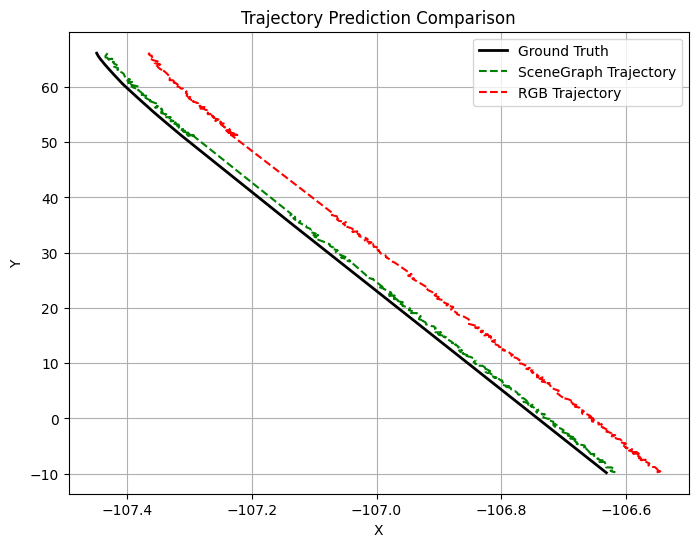

In [14]:
import random
import matplotlib.pyplot as plt

def read_positions(file_path, max_points=50):
    data = []
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split(",")
            if len(parts) >= 4:
                idx = int(parts[0].strip())
                x = float(parts[1].strip())
                y = float(parts[2].strip())
                z = float(parts[3].strip())
                data.append((idx, x, y, z))
                if len(data) >= max_points:
                    break
    return data

def generate_with_error(data, error_range):
    new_traj = []
    for idx, x, y, z in data:
        # Add random error to both x and y
        err_x = random.uniform(*error_range) 
        err_y = random.uniform(*error_range) 
        new_x = x + err_x
        new_y = y + err_y
        new_traj.append((idx, new_x, new_y, z))
    return new_traj

def plot_trajectories(gt, scenegraph, rgb):
    # Ground truth
    x_gt = [p[1] for p in gt]
    y_gt = [p[2] for p in gt]

    # SceneGraph
    x_sc = [p[1] for p in scenegraph]
    y_sc = [p[2] for p in scenegraph]

    # RGB
    x_rgb = [p[1] for p in rgb]
    y_rgb = [p[2] for p in rgb]

    plt.figure(figsize=(8,6))
    plt.plot(x_gt, y_gt, 'k-', label="Ground Truth", linewidth=2)
    plt.plot(x_sc, y_sc, 'g--', label="SceneGraph Trajectory")
    plt.plot(x_rgb, y_rgb, 'r--', label="RGB Trajectory")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajectory Prediction Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "/home/irfan/roadscene2vec/examples/transferdata/pos.txt"  # <-- change to your file path
    ground_truth = read_positions(file_path, max_points=1000)

    # Generate versions with error in x,y
    scenegraph_traj = generate_with_error(ground_truth, (0.01, 0.02))
    rgb_traj = generate_with_error(ground_truth, (0.08, 0.09))

    # Plot results
    plot_trajectories(ground_truth, scenegraph_traj, rgb_traj)


In [25]:
import pickle
from roadscene2vec import *
# Path to your .pkl file
file_path = '/home/irfan/Downloads/use_case_data-20250504T102722Z-001/use_case_data/271_carla_scenegraphs.pkl'

# Open and load the pickle file
with open(file_path, 'rb') as f:
    scene_graphs = pickle.load(f)

# Inspect the structure
print(type(scene_graphs))
print(scene_graphs.keys() if isinstance(scene_graphs, dict) else scene_graphs[:1])

ModuleNotFoundError: No module named 'util'

In [3]:
%pwd


'/home/irfan/roadscene2vec/examples'

In [1]:
import sys, pdb
from pathlib import Path
sys.path.append(str(Path("../../")))
%pwd
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm


In [1]:
%cd ../
%pwd



/home/irfan/roadscene2vec


'/home/irfan/roadscene2vec'

In [2]:
import os
import sys

sys.path.append(os.path.dirname(sys.path[0]))
import roadscene2vec
from roadscene2vec.util.config_parser import configuration
import roadscene2vec.scene_graph.extraction.image_extractor as RealEx
from roadscene2vec.learning.util.scenegraph_trainer import Scenegraph_Trainer
from torch_geometric.data import Data, DataLoader

    
    
    

In [4]:
scenegraph_extraction_config = configuration(r"/home/irfan/roadscene2vec/examples/use_case_2_scenegraph_extraction_config.yaml",from_function = True) #create scenegraph extraction config object

sg_extraction_object = RealEx.RealExtractor(scenegraph_extraction_config) #creating Real Image Preprocessor using config
sg_extraction_object.load() #preprocesses sequences by extracting frame data for each sequence
scenegraph_dataset = sg_extraction_object.getDataSet() #returned scenegraphs from extraction
scenegraph_dataset.save() #save ScenegraphDataset


# extracted_scenegraphs = extract_seq(scenegraph_extraction_config) #extracted scenegraphs for each frame for the given sequence into a ScenegraphDataset 
# training_config = configuration("/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
# trainer = Scenegraph_Trainer(training_config) #create trainer object using config

  0%|          | 0/1 [00:00<?, ?it/s]/home/irfan/miniconda3/envs/test_env/lib/python3.9/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Boxes: Boxes(tensor([[ 785.5082,  385.8770, 1084.0192,  510.8224],
        [ 270.3557,  384.6895,  502.0559,  496.8985]], device='cuda:0')), Labels: tensor([2, 2], device='cuda:0'), Image Size: (720, 1280)
Detections: [([785.5081787109375, 385.8769836425781, 298.510986328125, 124.94537353515625], 0.5, 2), ([270.35565185546875, 384.6895446777344, 231.70022583007812, 112.208984375], 0.5, 2)]
tracks   [<deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582447c0>, <deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582445b0>]
(Boxes(tensor([[ 785.5082,  385.8770, 1084.0192,  510.8224],
        [ 270.3557,  384.6895,  502.0559,  496.8985]], device='cuda:0')), tensor([2, 2], device='cuda:0'), (720, 1280))
Extracting scene graph for sequence 22 frame 97095 with 0 tracks
Adding node:  Root Road Root Road
Adding node:  ego car ego car
Adding node:  Left Lane Left Lane
Adding node:  Right Lane Right Lane
Adding node:  Middle Lane Middle Lane
Boxes:  Boxes(tensor([[ 785.5082,  385.87

100%|██████████| 1/1 [00:10<00:00, 10.34s/it]

Boxes: Boxes(tensor([[ 706.4570,  435.7354, 1274.6490,  714.3795]], device='cuda:0')), Labels: tensor([2], device='cuda:0'), Image Size: (720, 1280)
Detections: [([706.45703125, 435.7353515625, 568.1920166015625, 278.64410400390625], 0.5, 2)]
tracks   [<deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582447c0>, <deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582393d0>]
(Boxes(tensor([[ 706.4570,  435.7354, 1274.6490,  714.3795]], device='cuda:0')), tensor([2], device='cuda:0'), (720, 1280))
Extracting scene graph for sequence 22 frame 97114 with 2 tracks
Adding node:  Root Road Root Road
Adding node:  ego car ego car
Adding node:  Left Lane Left Lane
Adding node:  Right Lane Right Lane
Adding node:  Middle Lane Middle Lane
Boxes:  Boxes(tensor([[ 706.4570,  435.7354, 1274.6490,  714.3795]], device='cuda:0'))
Processing bounding box:  car
Actor:  ego_car
Actor:  car
Actor type:  car
Actor actor_:  1
Actor:  moto
Actor:  bicycle
Actor:  ped
Actor:  lane
Actor:  light
A

In [10]:
sorted_seq = sorted(scenegraph_dataset.labels)
print(f"Number of sequences: {(sorted_seq)}")
scenegraph_dataset.labels

for ind, seq in enumerate(sorted_seq): 
                data_to_append = {"sequence":trainer.scene_graph_dataset.process_real_image_graph_sequences(trainer.scene_graph_dataset.scene_graphs[seq], trainer.feature_list, folder_name = trainer.scene_graph_dataset.folder_names[ind] ), "label":trainer.scene_graph_dataset.labels[seq], "folder_name": trainer.scene_graph_dataset.folder_names[ind]}
                print("data_to_append", data_to_append)

Number of sequences: [22]


AttributeError: 'SceneGraphDataset' object has no attribute 'scene_graphs'

In [6]:
training_config = configuration("/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
trainer = Scenegraph_Trainer(training_config) #create trainer object using config
# trainer.split_dataset() #split ScenegraphDataset specified in learning config into training, testing data
# trainer.build_model() #build model specified in learning config
# trainer.learn()

In [13]:
#  training_config = configuration(r"use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
    # trainer = Scenegraph_Trainer(training_config) #create trainer object using config
sys.modules['util'] = roadscene2vec.util


def format_use_case_model_input(sequence, trainer):
        if trainer.config.training_configuration["scenegraph_dataset_type"] == "carla":
            for seq in sequence.scene_graphs:
                data = {"sequence":trainer.scene_graph_dataset.process_carla_graph_sequences(sequence.scene_graphs[seq], feature_list = trainer.feature_list, folder_name = sequence.folder_names[0]) , "label":None, "folder_name": sequence.folder_names[0]}
        elif trainer.config.training_configuration["scenegraph_dataset_type"] == "real": #by default the ScenegraphDataset extracted from a "real" image based sequence
            for seq in sequence.scene_graphs:
                data = {"sequence":trainer.scene_graph_dataset.process_real_image_graph_sequences(sequence.scene_graphs[seq], feature_list = trainer.feature_list, folder_name = sequence.folder_names[0]) , "label":None, "folder_name": sequence.folder_names[0]}
        else:
            raise ValueError('output():scenegraph_dataset_type unrecognized')
        data = data['sequence']
        graph_list = [Data(x=g['node_features'], edge_index=g['edge_index'], edge_attr=g['edge_attr']) for g in data]  
        train_loader = DataLoader(graph_list, batch_size=len(graph_list))
        sequence = next(iter(train_loader)).to(trainer.config.model_configuration["device"])
        
        return (sequence.x, sequence.edge_index, sequence.edge_attr, sequence.batch)    


def extract_seq(scenegraph_extraction_config):                                                                                          
    sg_extraction_object = RealEx.RealExtractor(scenegraph_extraction_config) #creating Real Image Preprocessor using config
    sg_extraction_object.load() #preprocesses sequences by extracting frame data for each sequence
    scenegraph_dataset = sg_extraction_object.getDataSet() #returned scenegraphs from extraction
    scenegraph_dataset.save() #save ScenegraphDataset
    return scenegraph_dataset #return ScenegraphDataset
    
def risk_assess():
    scenegraph_extraction_config = configuration(r"/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create scenegraph extraction config object
    extracted_scenegraphs = extract_seq(scenegraph_extraction_config) #extracted scenegraphs for each frame for the given sequence into a ScenegraphDataset 
    training_config = configuration("/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
    trainer = Scenegraph_Trainer(training_config) #create trainer object using config
    trainer.split_dataset() #split ScenegraphDataset specified in learning config into training, testing data
    trainer.build_model() #build model specified in learning config
    trainer.learn()
    model_input = format_use_case_model_input(extracted_scenegraphs, trainer) #turn extracted original sequence's extracted ScenegraphDataset into model input
    output, _ = trainer.model.forward(*model_input) #output risk assessment for the original sequence 
    return output   

# if __name__ == "__main__":
#     print(risk_assess()) #Assess risk of a driving sequence

In [5]:
# import os
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from roadscene2vec.learning.model.cnn_lstm import CNN_LSTM_Classifier

In [3]:
import sys, pdb
# from pathlib import Path
# sys.path.append(str(Path("../../")))
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from roadscene2vec.data.dataset import SceneGraphDataset
# from torch_geometric.data import Data, DataLoader, DataListLoader 
# from  util import *
from roadscene2vec.learning.util.metrics import get_metrics, log_wandb, log_wandb_transfer_learning 
from roadscene2vec.learning.util import *

scene_graph_dataset  = SceneGraphDataset()
scene_graph_dataset.dataset_save_path ="/home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl"
scene_graph_dataset_ = scene_graph_dataset.load()  

loading dataset /home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl


In [4]:
from torch_geometric.data import Data, DataLoader, DataListLoader 


In [5]:
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from roadscene2vec.learning.util.trainer import Trainer
from roadscene2vec.data.dataset import SceneGraphDataset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader, DataListLoader
from roadscene2vec.learning.util.metrics import get_metrics, log_wandb, log_wandb_transfer_learning 

In [6]:
from roadscene2vec.util.config_parser import configuration
# import roadscene2vec.scene_graph.extraction.image_extractor as RealEx
from roadscene2vec.learning.util.scenegraph_trainer import Scenegraph_Trainer




In [7]:
import roadscene2vec
from roadscene2vec.util.config_parser import configuration
import roadscene2vec.scene_graph.extraction.image_extractor as RealEx
from roadscene2vec.learning.util.scenegraph_trainer import Scenegraph_Trainer
from torch_geometric.data import Data, DataLoader
training_config = configuration(r"/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
trainer = Scenegraph_Trainer(training_config) #create trainer object using config
# trainer.build_transfer_learning_dataset() #build the dataset for transfer learning

In [8]:
trainer.scene_graph_dataset.labels

AttributeError: 'SceneGraphDataset' object has no attribute 'labels'

In [ ]:
sorted_seq = sorted(trainer.scene_graph_dataset.labels)
feature_list = set()
for i in range(9):
    feature_list.add("type_"+str(i))
# sorted_seq = sorted(scene_graph_dataset_.labels)



AttributeError: 'SceneGraphDataset' object has no attribute 'labels'

In [9]:
scene_graph_dataset  = SceneGraphDataset()
scene_graph_dataset.dataset_save_path ="/home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl"
scene_graph_dataset_ = scene_graph_dataset.load() 
sorted_seq = sorted(scene_graph_dataset_.labels)
print(f"Number of sequences: {(sorted_seq)}")

loading dataset /home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl
Number of sequences: [22]


In [10]:

for ind, seq in enumerate(sorted_seq): 
    print(f"Sequence: {seq}, Folder name: {ind}")
    scenegraphs=scene_graph_dataset_.scene_graphs[seq]
    print(f"Sequence: {seq}, Number of frames: {scenegraphs}")
    frame_numbers = sorted(list(scenegraphs.keys()))
    print(f"Sequence: {seq}, Number of frames: {(frame_numbers)}") 
    
    if frame_numbers == None:
            frame_numbers = sorted(list(scenegraphs.keys()))
    scenegraphs = [scenegraphs[frames] for frames in sorted(scenegraphs.keys())]
    sequence = []
    
    for idx, (scenegraph, frame_number) in enumerate(zip(scenegraphs, frame_numbers)):
            sg_dict = {}
    
            node_name2idx = {node: idx for idx,
                             node in enumerate(scenegraph.g.nodes)}
    
            sg_dict['node_features'] = scenegraph.get_real_image_node_embeddings(feature_list)
            print(f"Node features: {sg_dict['node_features']}")
            sg_dict['edge_index'], sg_dict['edge_attr'] = scenegraph.get_real_image_edge_embeddings(node_name2idx)
            print(f"Edge index: {sg_dict['edge_index']}, Edge attr: {sg_dict['edge_attr']}")
            # sg_dict['folder_name'] = folder_name
            sg_dict['frame_number'] = frame_number
            sg_dict['node_order'] = node_name2idx
            sequence.append(sg_dict)

Sequence: 22, Folder name: 0
Sequence: 22, Number of frames: {97095: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74b05628dc10>, 97096: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff03db070>, 97097: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff4c3f6d0>, 97098: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff0484f70>, 97099: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff0489ee0>, 97100: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff03c53a0>, 97101: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff05a5f10>, 97102: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff053bd30>, 97103: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff03ffdc0>, 97104: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff0458460>, 97105: <roadscene2vec.scene_graph.scene_graph.SceneGraph object at 0x74aff4bc7e20>, 97106: <roadsc

NameError: name 'feature_list' is not defined

In [17]:
feature_list = set()
for i in range(9):
    feature_list.add("type_"+str(i))
# sorted_seq = sorted(scene_graph_dataset_.labels)
for ind, seq in enumerate(sorted_seq): 
                data_to_append = {"sequence":scene_graph_dataset.process_real_image_graph_sequences(scene_graph_dataset,feature_list ), "label":scene_graph_dataset.labels[seq]}
                print("data_to_append", data_to_append)

AttributeError: 'SceneGraphDataset' object has no attribute 'keys'

In [18]:
sorted_seq = sorted(trainer.scene_graph_dataset.labels)
for ind, seq in enumerate(sorted_seq): 
    scenegraphs=scene_graph_dataset_.scene_graphs[seq]
    frame_numbers = sorted(list(scenegraphs.keys()))
    print(f"Sequence: {seq}, Number of frames: {(frame_numbers)}") 




AttributeError: 'SceneGraphDataset' object has no attribute 'labels'

In [ ]:
 self.labels

In [12]:
sorted_seq

[22]

In [18]:
trainer.split_dataset() #split ScenegraphDataset specified in learning config into training, testing data
trainer.build_model() #build model specified in learning config
trainer.learn()
    # model_input = format_use_case_model_input(extracted_scenegraphs, trainer) #turn extracted original sequence's extracted ScenegraphDataset into model input
    # output, _ = trainer.model.forward(*model_input) #output risk assessment for the original sequen

loading dataset /home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl


ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [3]:
sorted_seq = sorted(scene_graph_dataset_.labels)

for ind, seq in enumerate(sorted_seq): 
    scenegraphs=scene_graph_dataset_.scene_graphs[seq]
    frame_numbers = sorted(list(scenegraphs.keys()))
    print(f"Sequence: {seq}, Number of frames: {(frame_numbers)}")


Sequence: 22, Number of frames: [97095, 97096, 97097, 97098, 97099, 97100, 97101, 97102, 97103, 97104, 97105, 97106, 97107, 97108, 97109, 97110, 97111, 97112, 97113, 97114]


In [20]:
for idx, scenegraph in enumerate(scenegraphs):
            sg_dict = {}
    
            node_name2idx = {node: idx for idx,
                             node in enumerate(scenegraph.g.nodes)}
    
            sg_dict['node_features'] = scenegraph.get_real_image_node_embeddings(feature_list)
            sg_dict['edge_index'], sg_dict['edge_attr'] = scenegraph.get_real_image_edge_embeddings(node_name2idx)
            sg_dict['folder_name'] = folder_name
            sg_dict['frame_number'] = frame_number
            sg_dict['node_order'] = node_name2idx
            sequence.append(sg_dict)
    
        return sequence


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [ ]:


for ind, seq in enumerate(sorted_seq): 
    print(ind, seq,scene_graph_dataset_.labels[seq] )
#     data_to_append = {"sequence":scene_graph_dataset_.process_real_image_graph_sequences(scene_graph_dataset_.scene_graphs[seq], self.feature_list, folder_name = self.scene_graph_dataset.folder_names[ind] ), "label":self.scene_graph_dataset.labels[seq], "folder_name": self.scene_graph_dataset.folder_names[ind]}
#                 if self.scene_graph_dataset.labels[seq] == 0:
# #                     class_0.append(scene_graph_dataset.scene_graphs[seq]) #right now we are appending whole dictionary that contains data for all frame sg, shld we instead append each frame's sg separately
#                     class_0.append(data_to_append)  #maybe individually for graph based and all frames together in one for seq based?
#                                                                         #maybe instead create a massive dict with the form {seq:scene_graph_dataset.scene_graphs[seq], scene_graph_dataset.labels[seq]...}
#                 elif self.scene_graph_dataset.labels[seq] == 1:
#                     class_1.append(data_to_append)


0 22 1.0


In [ ]:
class_0 = []
        class_1 = []
        sorted_seq = sorted(self.scene_graph_dataset.labels)
        if self.config.training_configuration["scenegraph_dataset_type"] == "carla":
            for ind, seq in enumerate(sorted_seq): #for each seq in labels
                data_to_append = {"sequence":self.scene_graph_dataset.process_carla_graph_sequences(self.scene_graph_dataset.scene_graphs[seq], self.feature_list, folder_name = self.scene_graph_dataset.folder_names[ind] ), "label":self.scene_graph_dataset.labels[seq], "folder_name": self.scene_graph_dataset.folder_names[ind]}
                if self.scene_graph_dataset.labels[seq] == 0:
#                     class_0.append(scene_graph_dataset.scene_graphs[seq]) #right now we are appending whole dictionary that contains data for all frame sg, shld we instead append each frame's sg separately
                    class_0.append(data_to_append)  #maybe individually for graph based and all frames together in one for seq based?
                                                                        #maybe instead create a massive dict with the form {seq:scene_graph_dataset.scene_graphs[seq], scene_graph_dataset.labels[seq]...}
                elif self.scene_graph_dataset.labels[seq] == 1:
                    class_1.append(data_to_append)
                    
        elif self.config.training_configuration["scenegraph_dataset_type"] == "real":
            for ind, seq in enumerate(sorted_seq): 
                data_to_append = {"sequence":self.scene_graph_dataset.process_real_image_graph_sequences(self.scene_graph_dataset.scene_graphs[seq], self.feature_list, folder_name = self.scene_graph_dataset.folder_names[ind] ), "label":self.scene_graph_dataset.labels[seq], "folder_name": self.scene_graph_dataset.folder_names[ind]}
                if self.scene_graph_dataset.labels[seq] == 0:
#                     class_0.append(scene_graph_dataset.scene_graphs[seq]) #right now we are appending whole dictionary that contains data for all frame sg, shld we instead append each frame's sg separately
                    class_0.append(data_to_append)  #maybe individually for graph based and all frames together in one for seq based?
                                                                        #maybe instead create a massive dict with the form {seq:scene_graph_dataset.scene_graphs[seq], scene_graph_dataset.labels[seq]...}
                elif self.scene_graph_dataset.labels[seq] == 1:
                    class_1.append(data_to_append)
        elif self.config.training_configuration["scenegraph_dataset_type"] != None:
            raise ValueError('scenegraph_dataset_type not recognized') 
        
            
        y_0 = [0]*len(class_0)  
        y_1 = [1]*len(class_1)

        min_number = min(len(class_0), len(class_1))
        
        downsample = self.config.training_configuration["downsample"]
        
        if downsample:
            modified_class_0, modified_y_0 = resample(class_0, y_0, n_samples=min_number)
        else:
            modified_class_0, modified_y_0 = class_0, y_0
        train, test, train_y, test_y = train_test_split(modified_class_0+class_1, modified_y_0+y_1, test_size=self.config.training_configuration["split_ratio"], shuffle=True, stratify=modified_y_0+y_1, random_state=self.config.seed)
        if self.config.location_data["transfer_path"] != None:
            self.build_transfer_learning_dataset()
        #dont do kfold here instead it is done when learn() is called
        return train, test


In [4]:
scene_graph_dataset_

In [23]:
import sys, pdb
# from pathlib import Pa
# sys.path.append(str(Path("../../")))
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
# /home/irfan/roadscene2vec/roadscene2vec/data/dataset.py
from dataset import SceneGraphDataset
# from torch_geometric.data import Data, DataLoader, DataListLoader
# from roadscene2vec.learning.util.metrics import get_metrics, log_wandb, log_wandb_transfer_learning 

scene_graph_dataset  = SceneGraphDataset()
scene_graph_dataset.dataset_save_path ="/home/irfan/Downloads/use_case_data-20250504T102722Z-001/use_case_data/271_carla_scenegraphs.pkl"
scene_graph_dataset_ = scene_graph_dataset.load()  


ModuleNotFoundError: No module named 'dataset'

In [1]:
from dataloader import *
import sys, pdb
from pathlib import Path
# sys.path.append(str(Path("../../")))
import torch
import torch.nn as nn

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
# /home/irfan/roadscene2vec/roadscene2vec/data/dataset.py
from roadscene2vec.data.dataset import SceneGraphDataset
# from torch_geometric.data import Data, DataLoader, DataListLoader
from roadscene2vec.learning.util.metrics import get_metrics, log_wandb, log_wandb_transfer_learning 

scene_graph_dataset  = SceneGraphDataset()
# scene_graph_dataset.dataset_save_path ="/home/irfan/roadscene2vec/examples/object_based_sg_extraction_output.pkl"
# scene_graph_dataset_ = scene_graph_dataset.load() 
from torch.utils.data import DataLoader
from model import GCN_LSTM_PositionPredictor
from torch.utils.data import DataLoader, random_split

from torch.utils.data import DataLoader, random_split

ModuleNotFoundError: No module named 'dataloader'